# Recipe Recommendation System: EDA and Visualization

During preprocessing, we thoroughly cleaned the dataset to ensure it was accurate and consistent. This included fixing data types, removing outliers, and adding new features from existing data. For example, we split nutritional values into separate components, extracted detailed date information, and analyzed dietary preferences. With a clean and organized dataset ready, we can now move on to exploratory data analysis (EDA) to uncover valuable patterns and insights for improving our recipe recommendation system. So let us start by importing some necessary libraries.

In [21]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
recipe_df = pd.read_pickle("C:/Users/pd006/Desktop/internship_search/machine_learning/Recipe-Recommender-System/data/recipe.pkl")

In [6]:
#dietary_restrictions = ["lactose_intolerance", "gluten_intolerance", "vegetarianism", "veganism", "kosher", "dairy-free", "low-carb"]

For now let us start by displaying all the columns in `receipe_df`.

In [9]:
recipe_df.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'tags', 'n_steps', 'steps',
       'description', 'ingredients', 'n_ingredients', 'calories', 'total_fat',
       'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates',
       'lactose_intolerance', 'gluten_intolerance', 'vegetarianism',
       'veganism', 'kosher', 'dairy-free', 'low-carb', 'submitted_day',
       'submitted_month', 'submitted_year'],
      dtype='object')

Now let us focus on the following nutrition columns:
1. `calories`
2. `total_fat`
3. `sugar`
4. `sodium`
5. `protein`
6. `saturated_fat`
7. `carbohydrates`


In [15]:
nutrition_col_names = ["calories", "total_fat", "sugar", "sodium", "protein", "saturated_fat", "carbohydrates"]

In [16]:
recipe_df.describe()[nutrition_col_names]

,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
count,200547.000000,200547.000000,200547.000000,200547.00000,200547.000000,200547.000000,200547.000000
mean,451.556632,34.361362,81.061771,28.05862,32.269598,43.381736,14.969842
std,1214.905851,75.688297,844.348505,123.27551,53.136431,92.087380,86.050302
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,167.300000,8.000000,9.000000,4.00000,6.000000,6.000000,4.000000
50%,300.000000,19.000000,24.000000,14.00000,17.000000,21.000000,8.000000
75%,497.000000,39.000000,66.000000,31.00000,47.000000,50.000000,16.000000
max,434360.200000,17183.000000,362729.000000,29338.00000,6552.000000,10395.000000,36098.000000


The maximum value is significantly larger than the 75th percentile for all the nutrition columns. This suggests the presence of extreme values.

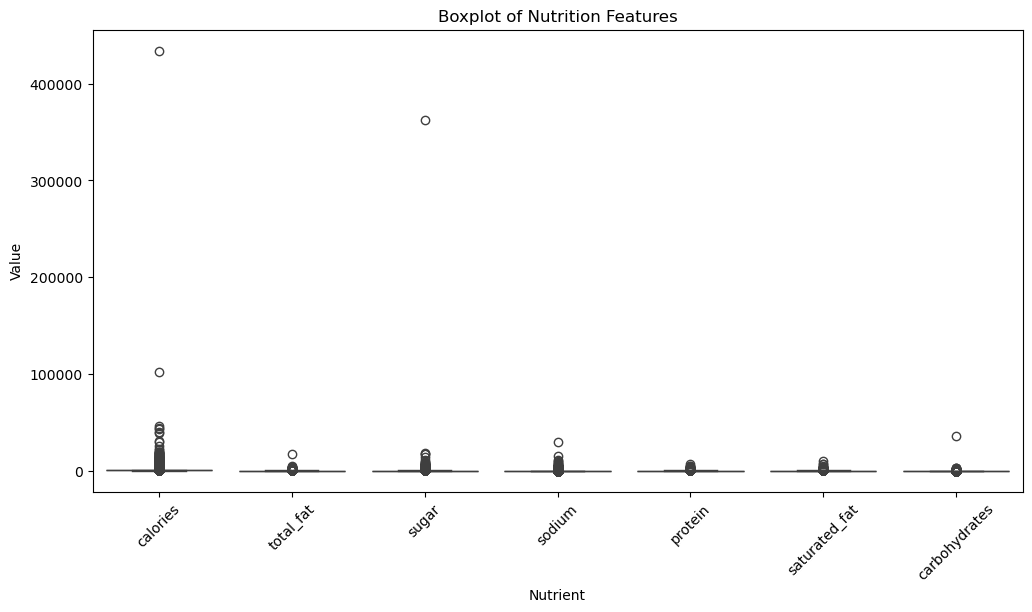

In [19]:
# Melt the dataframe to long format
df_melted = recipe_df[nutrition_col_names].melt(var_name="Nutrient", value_name="Value")
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Nutrient", y="Value", data=df_melted)
plt.title("Boxplot of Nutrition Features")
plt.xticks(rotation=45)
plt.show()


Notice that the boxplot appears as a horizontal line, it indicates that the range of most values is very small compared to extreme outliers. Outliers are stretching the y-axis scale, compressing the box (IQR range) into a line. To get around it we can apply a logarithmic transformation to reduce the skewness of the data caused by outliers

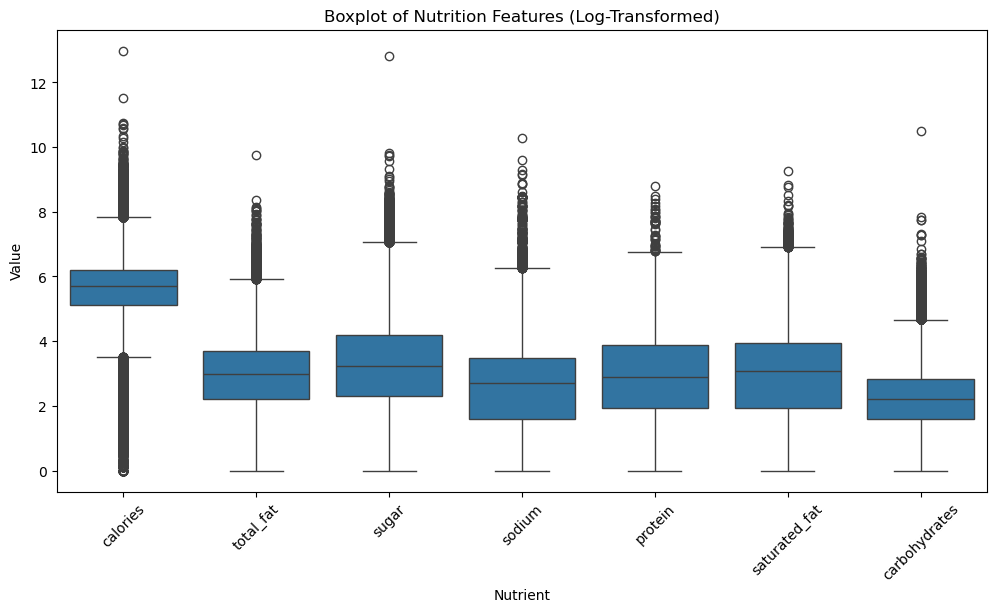

In [22]:
# Log-transform the data (adding 1 to avoid log(0))
df_log = recipe_df[nutrition_col_names].apply(lambda x: np.log1p(x))

# Melt the transformed dataframe
df_log_melted = df_log.melt(var_name="Nutrient", value_name="Value")

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Nutrient", y="Value", data=df_log_melted)
plt.title("Boxplot of Nutrition Features (Log-Transformed)")
plt.xticks(rotation=45)
plt.show()

Without information about serving sizes (e.g., 100g, 1 cup, or 1 piece), the raw values in columns like "calories," "sodium," or "sugar" cannot be interpreted accurately. For instance, 450 calories might be reasonable for a meal-sized portion but could be excessive for a single cookie. Removing outliers without considering serving size risks excluding valid data points. For example, a data point with 2,000 calories might represent a family-sized dish rather than an error or anomaly. Therefore, we will not arbitrarily remove any data points.

### Correlation Analysis

Let us check for any collinearity between the columns of the dataset. Since we already have the `food_df` dataframe, which combines information from the `recipe_df` and `users_df` dataframes, we will use it for this analysis.

In [24]:
food_df = pd.read_pickle("C:/Users/pd006/Desktop/internship_search/machine_learning/Recipe-Recommender-System/data/food.pkl")

In [25]:
food_df.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'tags', 'n_steps', 'steps',
       'description', 'ingredients', 'n_ingredients', 'calories', 'total_fat',
       'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates',
       'lactose_intolerance', 'gluten_intolerance', 'vegetarianism',
       'veganism', 'kosher', 'dairy-free', 'low-carb', 'submitted_day',
       'submitted_month', 'submitted_year', 'recipe_id', 'votes',
       'avg_rating'],
      dtype='object')

Since the `*id` columns will not exhibit any correlation structure, we will exclude them from the correlation plot. To achieve this, we will convert them into strings.

In [26]:
food_df["id"] = food_df["id"].astype(str)
food_df["contributor_id"] = food_df["contributor_id"].astype(str)
food_df["recipe_id"] = food_df["recipe_id"].astype(str)

In [27]:
# sanity check
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196439 entries, 0 to 196438
Data columns (total 30 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   name                 196439 non-null  object 
 1   id                   196439 non-null  object 
 2   minutes              196439 non-null  int64  
 3   contributor_id       196439 non-null  object 
 4   tags                 196439 non-null  object 
 5   n_steps              196439 non-null  int64  
 6   steps                196439 non-null  object 
 7   description          196439 non-null  object 
 8   ingredients          196439 non-null  object 
 9   n_ingredients        196439 non-null  int64  
 10  calories             196439 non-null  float64
 11  total_fat            196439 non-null  float64
 12  sugar                196439 non-null  float64
 13  sodium               196439 non-null  float64
 14  protein              196439 non-null  float64
 15  saturated_fat    

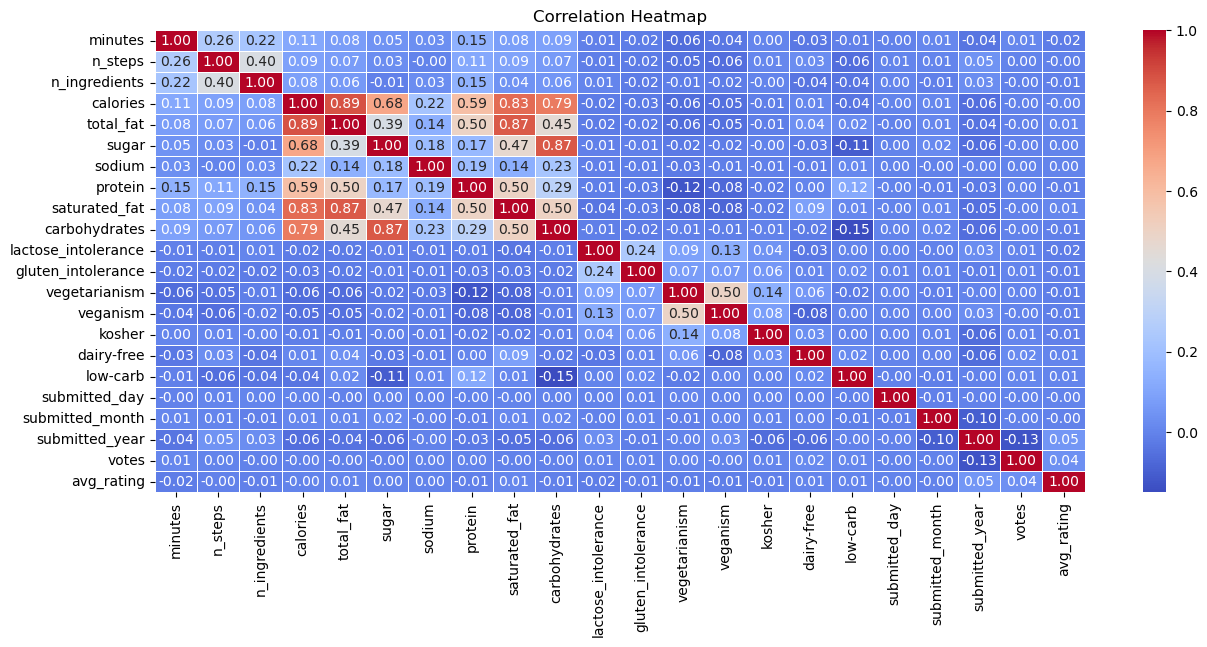

In [34]:
plt.figure(figsize=(15,6))
numeric_df = food_df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Create heatmap with better spacing
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f",  # Limits decimal places for clarity
            cmap="coolwarm",  # Enhances color contrast
            linewidths=0.5,  # Adds space between cells
            annot_kws={"size": 10})  # Adjust annotation font size
# Show plot
plt.title("Correlation Heatmap")
plt.show()

Let us take a closer look at the submatrix in the upper left corner.

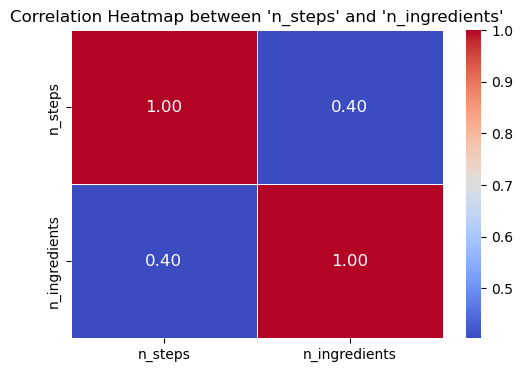

In [41]:
# Set figure size
plt.figure(figsize=(6, 4))
# Slice the correlation matrix to include only 'n_steps' and 'n_ingredients'
subset_matrix_1 = correlation_matrix.loc[["n_steps", "n_ingredients"], ["n_steps", "n_ingredients"]]

# Create heatmap for the small subset
sns.heatmap(subset_matrix_1, 
            annot=True, 
            fmt=".2f",  # Limits decimal places for clarity
            cmap="coolwarm",  # Enhances color contrast
            linewidths=0.5,  # Adds space between cells
            annot_kws={"size": 12})  # Adjust annotation font size

# Show plot
plt.title("Correlation Heatmap between 'n_steps' and 'n_ingredients'")
plt.show()

We see that `n_ingredients` is positively correlated with `n_steps`. This makes sense because a higher number of ingredients typically requires more steps to prepare a dish that incorporates all of them.

Now let us focus on the largest submatrix.

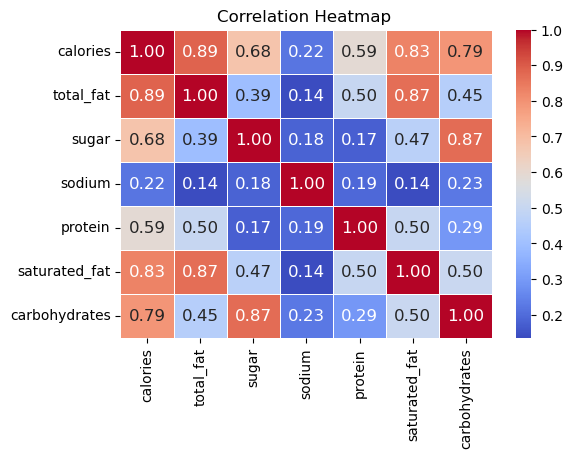

In [42]:
# nutrition_col_names
# Set figure size
plt.figure(figsize=(6, 4))
# Slice the correlation matrix to include only 'n_steps' and 'n_ingredients'
subset_matrix_2 = correlation_matrix.loc[nutrition_col_names, nutrition_col_names]

# Create heatmap for the small subset
sns.heatmap(subset_matrix_2, 
            annot=True, 
            fmt=".2f",  # Limits decimal places for clarity
            cmap="coolwarm",  # Enhances color contrast
            linewidths=0.5,  # Adds space between cells
            annot_kws={"size": 12})  # Adjust annotation font size

# Show plot
plt.title("Correlation Heatmap ")
plt.show()

We observe that `total_fat` is highly positively correlated with `calories`. This makes sense because fat is a major contributor to calorie content. Foods high in fat, such as oils, butter, nuts, and cheese, are typically rich in calories.

The same applies to `saturated_fat` and `calories`. Many processed foods, such as pastries, chips, and fast food, contain significant amounts of saturated fat to enhance flavor and texture, which increases their overall calorie content.

Similarly, `sugar` is positively correlated with `calories`, as sugar is a source of energy and is often found in calorie-dense foods. Foods rich in added sugars—such as desserts, candies, sugary beverages, and pastries—tend to be high in calories due to their concentrated sugar content.

Additionally, `protein` shows a positive correlation with `calories`. This is because protein contributes to calorie content due to its energy value and its presence in many high-calorie foods.

Likewise, `carbohydrates` are positively correlated with `calories`. Carbohydrates are a primary energy source and are commonly found in high-calorie processed or sugary foods.

Finally, `protein` and `fat` are moderately positively correlated. This is expected, as many high-protein foods, particularly animal-based products, also contain fats (e.g., cheese, salmon, beef). This combination further increases the total calorie count.

### User Engagement Analysis

In this section, we will analyze the distribution of user ratings and their interactions. We will examine how ratings are distributed across different recipes and identify any patterns or trends. Additionally, we will explore user engagement levels to gain insights into their preferences and behaviors.

Let us start by loading the dataframe.

In [44]:
users_df = pd.read_pickle("C:/Users/pd006/Desktop/internship_search/machine_learning/Recipe-Recommender-System/data/users.pkl")

In [45]:
# check the column names
users_df.columns

Index(['user_id', 'recipe_id', 'rating', 'review', 'date_day', 'date_month',
       'date_year'],
      dtype='object')

We will analyze the distribution of ratings by summing the total count for each individual rating. Then, we will visualize the data using a bar plot, displaying the ratings in a sorted manner for better clarity

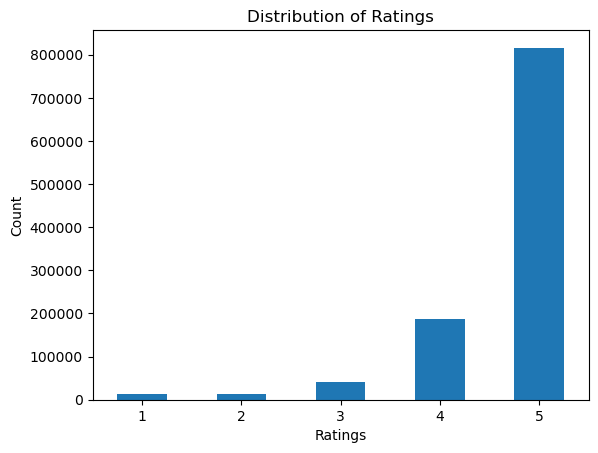

In [46]:
users_df["rating"].value_counts().sort_index().plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("Ratings")  # Label for the x-axis
plt.ylabel("Count")  # Label for the y-axis
plt.title("Distribution of Ratings");  # Title to the plot

Users tend to engage more with recipes they enjoy, as seen in the high number of 5-star ratings. This suggests that most users are satisfied with the recipes, and the platform likely features high-quality content.

Several reasons could explain this positive bias. Users often try recipes they expect to like, leading to higher ratings. They are also more likely to leave feedback after a good experience than a bad one. If a recipe comes from a trusted chef or already has a high rating, users might rate it well regardless of its actual quality.

Social factors also play a role. Some users may hesitate to give low ratings, especially to creators they admire. Highly rated recipes attract more attention, reinforcing positive feedback. Personal experiences, like cooking for loved ones, can also make a recipe feel more enjoyable, leading to higher ratings.

Overall, many factors contribute to the large number of positive ratings.

Next, we will create a time series plot to visualize user interactions from 2000 to 2018, covering the full range of available data.

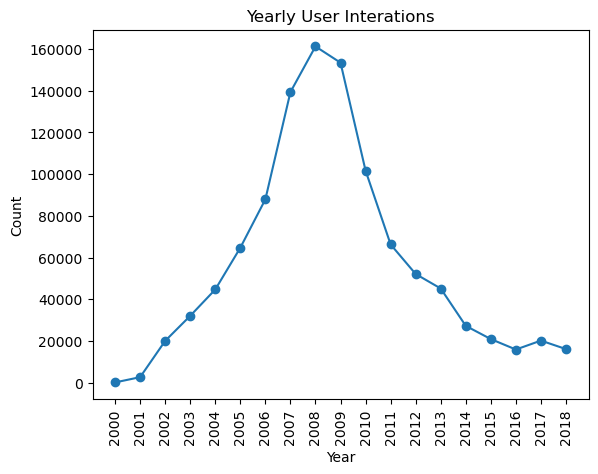

In [49]:
users_df["date_year"].value_counts().sort_index().plot(kind="line", marker='o')

plt.xticks(ticks=users_df["date_year"].value_counts().sort_index().index, 
           labels=users_df["date_year"].value_counts().sort_index().index.astype(int),
          rotation=90);  

# Add labels and title
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Yearly User Interations");

User engagement showed non-linear growth from 2000 to 2008, followed by a decline until 2016.

**Growth Phase (2000-2008)**  
During this period, Food.com likely gained popularity, attracting more users and increasing participation through recipe ratings. The early 2000s saw a rise in online cooking communities, which may have contributed to the platform’s growth.

**Decline Phase (Post-2008)**  
After 2008, user engagement dropped. This could be due to factors such as the 2008 financial crisis, competition from emerging platforms like social media and food blogs, changes in consumer behavior, or dissatisfaction with platform updates.

Next, we will plot a time series line plot that depicts the count of new recipes added each year, ranging from 1990 to 2018. This will help us understand trends in recipe uploads over time. By visualizing the data, we can identify any notable spikes or declines in activity across the years.

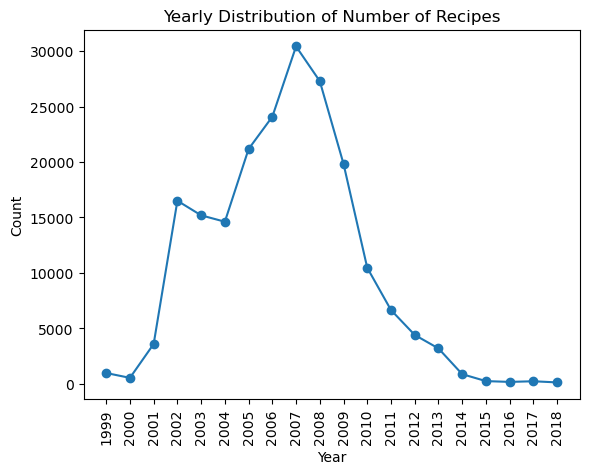

In [52]:
recipe_df["submitted_year"].value_counts().sort_index().plot(kind="line", marker="o")
plt.xticks(ticks=recipe_df["submitted_year"].value_counts().sort_index().index, 
           labels=recipe_df["submitted_year"].value_counts().sort_index().index.astype(int),
          rotation=90);  
# Add labels and title
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Yearly Distribution of Number of Recipes");

As before, we see a surge in recipe contributions up until 2007. This initial growth in recipe sharing on Food.com can be attributed to its early role in online recipe sharing. In the mid-2000s, however, new platforms like social media and food blogs became more popular. These sites offered more personalized and interactive ways to find and share recipes, likely drawing users away from Food.com and reducing the number of new recipes being added.

As the internet evolved, users began seeking more dynamic content, such as video tutorials and interactive cooking lessons. Platforms like YouTube and later Instagram capitalized on this trend by offering visually engaging and easily consumable content. In contrast, Food.com, which was primarily text-based, may have seen a decline in user contributions.

By 2007, Food.com had built a large collection of recipes, which may have led to content saturation. As the platform became well-stocked with common recipes, the incentive to add new ones decreased, leading to fewer contributions.

Now, we will examine the distributions on a log scale for the dietary restrictions that were created during the feature engineering process in the preprocessing steps. The dietary restrictions we are analyzing include: `lactose_intolerance`, `gluten_intolerance`, `vegetarianism`, `veganism`, `kosher`, `dairy-free`, `low-carb`. These are the restrictions we will focus on.

In [53]:
dietary_restrictions = ["lactose_intolerance", "gluten_intolerance", "vegetarianism", "veganism", "kosher", "dairy-free", "low-carb"]

In [54]:
restriction_counts = recipe_df[dietary_restrictions].sum()
restriction_counts

lactose_intolerance     3647
gluten_intolerance      5048
vegetarianism          31959
veganism                8938
kosher                  3809
dairy-free             26805
low-carb               36727
dtype: int64

Now, we will identify any restrictions not included in the list above and classify them as `other`. After that, we will analyze the distribution of all dietary restrictions on a log scale.

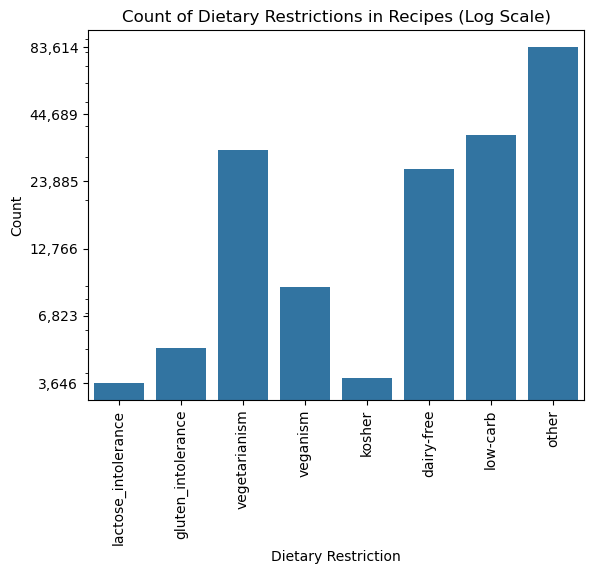

In [55]:
restriction_counts['other'] = len(recipe_df) - restriction_counts.sum()

# Plot bar chart of dietary restriction counts with log scale
sns.barplot(x=restriction_counts.index, y=restriction_counts.values)
plt.xlabel('Dietary Restriction')
plt.ylabel('Count')
plt.yscale('log')
plt.title('Count of Dietary Restrictions in Recipes (Log Scale)')
plt.xticks(rotation=90)

# Customize y-axis ticks for better readability
max_val = restriction_counts.max()
min_val = restriction_counts[restriction_counts > 0].min()
ticks = np.logspace(np.log10(min_val), np.log10(max_val), num=6)  # Generate 6 log-spaced ticks
plt.yticks(ticks, labels=[f"{int(tick):,}" for tick in ticks])  # Format tick labels as integers with commas

plt.show()


The `other` category represents entries that did not match any of the specified dietary restrictions. Some tags were labeled as "dietary", but they didn't specify a particular restriction. Tags like "high-calcium," "high-in-something," and "kid-friendly" were also not included when we divided the restrictions.

Vegetarian, dairy-free, and low-carb foods are the most prominent restrictions that stand out. It's important to note that recipes can have multiple dietary restrictions, as these categories are not mutually exclusive. The graph shows the popularity of different dietary preferences among the recipes in the dataset.

Now, let's identify the top ten recipes with an average rating of 5 stars. We'll sort the recipes based on their ratings and filter for those with a perfect score to highlight the most highly-rated recipes.

In [56]:
# boolean masking
entries_with_5_stars = food_df[food_df["avg_rating"] == 5]
top_10_entries = entries_with_5_stars.sort_values(by="votes", ascending=False).head(10)

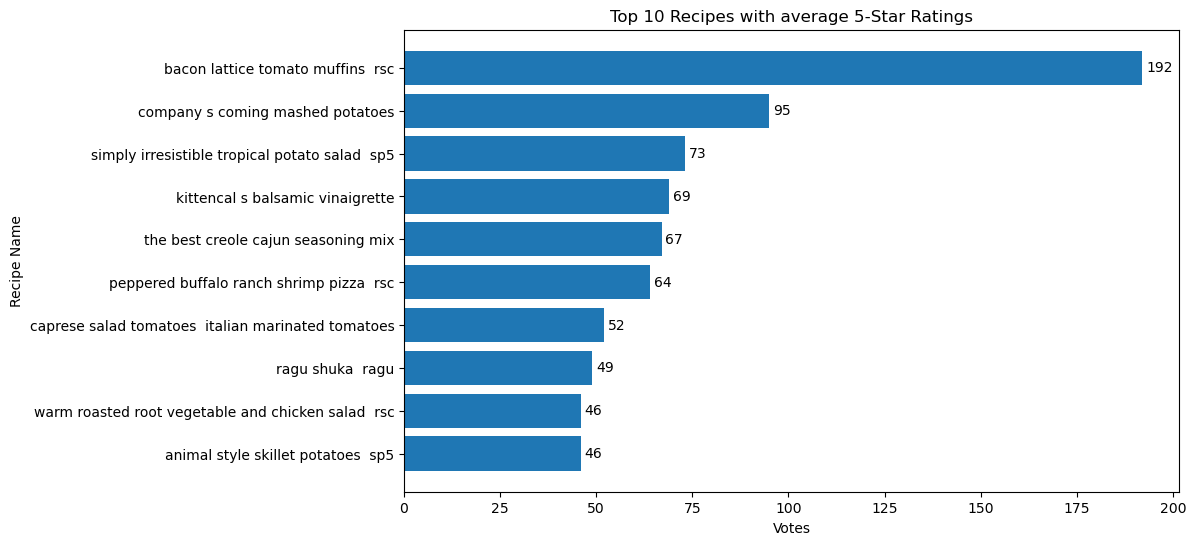

In [57]:
# Plot a horizontal bar plot
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_entries["name"], top_10_entries["votes"])
plt.xlabel("Votes")
plt.ylabel("Recipe Name")
plt.title("Top 10 Recipes with average 5-Star Ratings")
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top;
# Add annotations
for bar in bars:
    plt.text(bar.get_width()+1 , bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}', va='center', ha='left', color='black')

We can also visualize the most popular ingredients using a word cloud, which will give us a clear view of the ingredients most frequently used in these top-rated recipes.

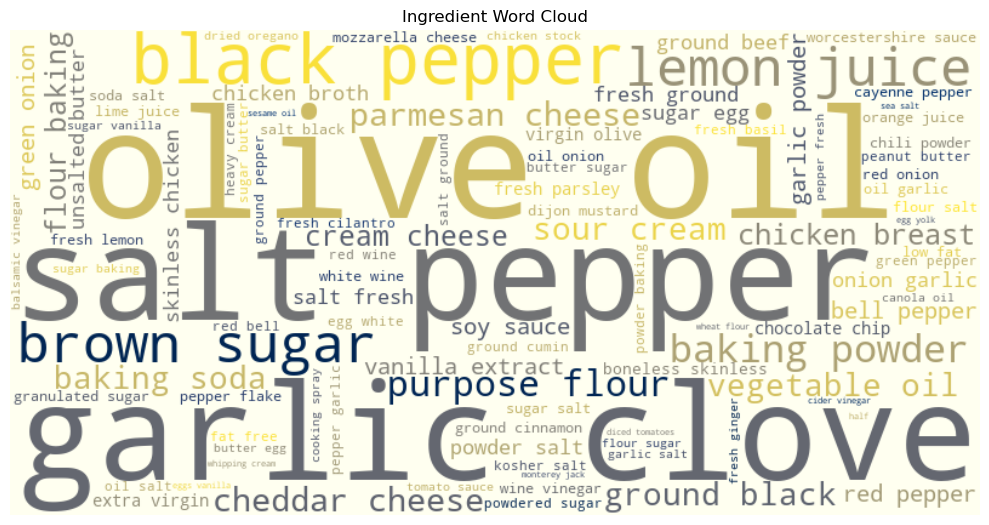

In [58]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Clean and process the ingredients text
ingredients_text = ' '.join(recipe_df['ingredients'].explode().str.replace("'", "").str.lower())
filtered_text = ' '.join([word for word in ingredients_text.split() if word not in ENGLISH_STOP_WORDS])

# Create and display the word cloud
wordcloud = WordCloud(
    width=800, height=400, background_color='ivory', colormap='cividis', max_words=100
).generate(filtered_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.title('Ingredient Word Cloud')
plt.tight_layout()

The word cloud displays the most common ingredients in the recipe dataset. The larger and bolder words indicate ingredients that appear more frequently. Ingredients like "salt," "pepper," "olive oil," "garlic clove," and "black pepper" are commonly found, as they are basic seasonings used in many recipes. These ingredients play a crucial role in enhancing flavor and improving the taste of various dishes. They appear in recipes because:

* They are used across many cuisines, making them very common.
* They help balance flavors and are found in both savory and some sweet dishes.
* Their frequent usage leads to their higher occurrence in recipe datasets.

### Conclusion
The analysis reveals several insights about the recipe dataset. Common dietary preferences such as 'low-carb', 'vegetarian', 'vegan', 'gluten-free', and 'dairy-free' are prevalent, though the dataset may not cover all regional variations. User interactions peaked in 2008, then declined, likely due to changing trends rather than recipe preferences. Recipe submissions grew until 2017, with a decline that may be linked to platform changes. Nutritional outliers remain in the dataset due to unclear serving sizes, potentially affecting results. Strong correlations were found between 'calories' and both 'total_fat' and 'saturated_fat', while moderate links were observed between 'calories' and 'carbohydrates', and 'n_steps' and 'n_ingredients'. The word cloud highlights common ingredients, but seasonal factors may also influence ingredient choices. Most user ratings are positive, but potential bias calls for further analysis to understand the true impact on ratings.

The EDA gives useful insights into nutrition, dietary preferences, user interactions, and ingredient usage. These findings will help with further analysis and building the recommendation model. Next, we’ll move on to the modeling phase.